In [1]:
import json
import os
import sys
import math
import datetime
import pathlib

dir_path = pathlib.Path(os.path.abspath('')).resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat/OpenFormat-Public'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *
num_rows = 1000 * 1000
num_cols = 20
workload_list = ['int', 'float', 'string']
scan_exec_pq = f'/home/haoyuq/EvaluationOfColumnarFormats/arrow-private/arrow-Public/cpp/out/build/openformat-release-static/release/parquet-scan-columnbatch'

/home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/python/encoding


In [2]:
%%time
# generate csv files
os.chdir(f'{PROJ_SRC_DIR}/benchmark/generator_v2')
!pwd
for wl in workload_list:
    base_name = f'{wl}_r{num_rows}_c{num_cols}'
    os.system(f'python3 gen_workloads.py \
        {wl} {num_rows} {num_cols} {base_name}')
    os.system(f'cp -r {base_name} {dir_path} && \
        rm -r {base_name}')
os.chdir(dir_path)
!pwd


/home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/benchmark/generator_v2
Finish core dataset! 🎉🎉🎉🎉🎉🎉
Generating Done!!
🤔 INFO: too many collisions in int_unique_list, 20539 values just use (max_value + 1)!
🤔 INFO: too many collisions in int_unique_list, 7459 values just use (max_value + 1)!
Finish core dataset! 🎉🎉🎉🎉🎉🎉
Generating Done!!
Finish core dataset! 🎉🎉🎉🎉🎉🎉
Generating Done!!
/home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/python/encoding
CPU times: user 25.6 ms, sys: 8.89 ms, total: 34.5 ms
Wall time: 5min 8s


In [7]:
pq_config = enumerate_config(f'{PROJ_SRC_DIR}/python/experiments/pq_encoding.json')
orc_config = enumerate_config(f'{PROJ_SRC_DIR}/python/experiments/orc_encoding.json')
pq_name_suffix = '_' + "_".join([str(i) for i in list(pq_config[0].values())]) + '.parquet'
orc_name_suffix = '_' + "_".join([str(i) for i in list(orc_config[0].values())]) + '.orc'
print(pq_config)

loading config from /home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/python/experiments/pq_encoding.json ...
loading config from /home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/python/experiments/orc_encoding.json ...
[{'compression': 'NONE', 'use_dictionary': True, 'dictionary_pagesize_limit': 2147483647, 'version': '2.6', 'data_page_version': '2.0'}]


In [5]:
os.chdir(f'{PROJ_SRC_DIR}/python')
my_password = ''
# workload_lists = ['core', 'geo', 'classic', 'log', 'ml']
for wl in workload_list:
    base_name = f'{wl}_r{num_rows}_c{num_cols}'
    os.system(f'cp encoding/{base_name}/gen_data/{base_name}.csv data_gen')
    os.system(f'echo {my_password} | sudo -S /home/haoyuq/miniconda3/envs/gen/bin/python scripts/parquet_exp.py {base_name} pq_encoding -r=false -o=false')
    os.system(f'echo {my_password} | sudo -S /home/haoyuq/miniconda3/envs/gen/bin/python scripts/orc_exp.py {base_name} orc_encoding -r=false -o=false')
    # orc_schema = open(f'encoding/{base_name}/gen_data/{base_name}_orc_schema.txt', 'r').read()
    # os.system(f'{HOME_DIR}/orc/build/tools/src/csv-import \"{orc_schema}\" \
    #         encoding/{base_name}/gen_data/{base_name}.csv {base_name}.orc')
    os.system(f'mv {base_name}{pq_name_suffix} encoding/{base_name}.parquet')
    os.system(f'mv {base_name}{orc_name_suffix} encoding/{base_name}.orc')
    # os.system(f'mv {base_name}.orc encoding/{base_name}.orc')
os.chdir(f'{PROJ_SRC_DIR}/python/encoding')

[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6683943271636963


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 2.1885080337524414


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 1.2404217720031738


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 13.134593963623047


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 1.4973573684692383


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 11.838960886001587


# RLE breakdown

In [21]:
run_list = [2, 3, 4, 5,6,7,8, 9,10]

In [22]:
my_password = ''

In [7]:
%time
os.chdir(f'{PROJ_SRC_DIR}/python/data_gen')
for run in run_list:
    os.system(f'echo {my_password} | sudo -S /home/haoyuq/miniconda3/envs/gen/bin/python gen_simple_short_repeat.py {run}')
os.chdir(f'{PROJ_SRC_DIR}/python')
for run in run_list:
    base_name = f'idx_run{run}_max9'
    os.system(f'echo {my_password} | sudo -S /home/haoyuq/miniconda3/envs/gen/bin/python scripts/parquet_exp.py {base_name} pq_encoding -r=false -o=false')
    os.system(f'echo {my_password} | sudo -S /home/haoyuq/miniconda3/envs/gen/bin/python scripts/orc_exp.py {base_name} orc_encoding -r=false -o=false')
    # orc_schema = open(f'encoding/{base_name}/gen_data/{base_name}_orc_schema.txt', 'r').read()
    # os.system(f'{HOME_DIR}/orc/build/tools/src/csv-import \"{orc_schema}\" \
    #         encoding/{base_name}/gen_data/{base_name}.csv {base_name}.orc')
    os.system(f'mv {base_name}{pq_name_suffix} encoding/{base_name}.parquet')
    os.system(f'mv {base_name}{orc_name_suffix} encoding/{base_name}.orc')
    # os.system(f'mv {base_name}.orc encoding/{base_name}.orc')
os.chdir(f'{PROJ_SRC_DIR}/python/encoding')


CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 6.44 µs


[sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6561338901519775


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 2.435835361480713


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6405761241912842


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 2.13786244392395


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6498467922210693


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 2.0574522018432617


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6417257785797119


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 1.9925737380981445


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6426141262054443


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 1.954735279083252


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6407105922698975


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 1.9100356101989746


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6202132701873779


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 2.069932699203491


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6248211860656738


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 1.8508849143981934


[sudo] password for haoyuq: 

loading config from ./experiments/pq_encoding.json ...
----Running experiment: 1 out of 1----
NONE_True_2147483647_2.6_2.0
write parquet time (s): 0.6134727001190186


[sudo] password for haoyuq: 

loading config from ./experiments/orc_encoding.json ...
----Running experiment:----
UNCOMPRESSED_speed_1_2147486647
write orc time (s): 1.8476965427398682


In [23]:
# running experiments
import yaml
os.system('rm outputs/stats.json')
os.chdir(f'{PROJ_SRC_DIR}/python')
prev = 10

columns = []
for i in range(20):
    columns.append({'name': f'col{i}', 'type':'string'})

for run in run_list[:1]:
    base_name = f'idx_run{run}_max9'
    with open(f'data_gen/{base_name}_btrblocks_schema.yaml','w') as f:
        yaml.dump({'columns':columns}, f)

    # change scheme
    old_text = f'rle_run_length_threshold{prev}'
    new_text = f'rle_run_length_threshold{run}'
    os.system(f"sed -i s'/{old_text}/{new_text}/g' /home/haoyuq/btrblocks/btrblocks/scheme/SchemeConfig.hpp")
    prev = run
    # rebuild
    os.chdir("/home/haoyuq/btrblocks/build")
    os.system("make")
    os.chdir(f'{PROJ_SRC_DIR}/python')

    # create btr
    os.system(f'mkdir encoding/{base_name}')
    os.system(f'mkdir encoding/{base_name}/binary')
    os.system(f'mkdir encoding/{base_name}/btr')

    os.system(f'~/btrblocks/build/csvtobtr -create_binary -binary encoding/{base_name}/binary/ -csv data_gen/{base_name}.csv -yaml data_gen/{base_name}_btrblocks_schema.yaml')
    os.system(f'~/btrblocks/build/csvtobtr -create_btr -btr encoding/{base_name}/btr/ -binary encoding/{base_name}/binary/ -csv data_gen/{base_name}.csv -yaml data_gen/{base_name}_btrblocks_schema.yaml')

    os.chdir(f'{PROJ_SRC_DIR}/python/encoding')
    os.system(f'echo {my_password} | sudo -S sync; echo {my_password} | sudo sh -c "/usr/bin/echo 3 > /proc/sys/vm/drop_caches"')
    time.sleep(1)
    btrblocks_out = os.popen(f'''~/btrblocks/build/decompression-speed -output_summary \
                    -btr {base_name}/btr/ -threads 1''').read().split('\n')[-2],
    btrblocks_read = float(btrblocks_out[0].split(' ')[-4])
    btrblocks_size = float(btrblocks_out[0].split(' ')[1]),
    btrblocks_out_preload = os.popen(f'''~/btrblocks/build/decompression-speed -output_summary \
                    -btr {base_name}/btr/ -threads 1''').read().split('\n')[-2],
    btrblocks_read_preload = float(btrblocks_out_preload[0].split(' ')[-4])
    os.system(f'echo {my_password} | sudo -S sync; echo {my_password} | sudo sh -c "/usr/bin/echo 3 > /proc/sys/vm/drop_caches"')
    time.sleep(1)
    pq_read = float(os.popen(f'''{scan_exec_pq} \
            --batch_size=1024 ./{base_name}.parquet''').read().split('\n')[0].split(' ')[-2])
    pq_read_preload = float(os.popen(f'''{scan_exec_pq} \
            --batch_size=1024 ./{base_name}.parquet''').read().split('\n')[0].split(' ')[-2])
    os.system(f'echo {my_password} | sudo -S sync; echo {my_password} | sudo sh -c "/usr/bin/echo 3 > /proc/sys/vm/drop_caches"')
    time.sleep(1)
    orc_read = float(os.popen(f'''{HOME_DIR}/orc/orc/build/tools/src/orc-scan \
            -b 1024 ./{base_name}.orc''').read().split('\n')[0].split(' ')[-1])
    orc_read_preload = float(os.popen(f'''{HOME_DIR}/orc/orc/build/tools/src/orc-scan \
            -b 1024 ./{base_name}.orc''').read().split('\n')[0].split(' ')[-1])
    orc_size = os.path.getsize(f'{base_name}.orc')
    pq_size = os.path.getsize(f'{base_name}.parquet')
    output_stats = {}
    output_stats['run'] = run
    output_stats['file'] = 'parquet'
    output_stats['size'] = pq_size
    output_stats['read_time'] = pq_read
    output_stats['read_time_preload'] = pq_read_preload
    parse_output(output_stats)
    output_stats['file'] = 'orc'
    output_stats['size'] = orc_size
    output_stats['read_time'] = orc_read
    output_stats['read_time_preload'] = orc_read_preload
    parse_output(output_stats)
    output_stats['file'] = 'btrblocks'
    output_stats['size'] = btrblocks_size
    output_stats['read_time'] = btrblocks_read
    output_stats['read_time_preload'] = btrblocks_read_preload
    parse_output(output_stats)
    os.chdir(f'{PROJ_SRC_DIR}/python')
os.chdir(f'{PROJ_SRC_DIR}/python/encoding')
collect_results()
os.system('mv outputs/stats.csv ../outputs/{}_{}.csv'.format('decode_rle', timestamp))

[  3%] Built target fastpfor_src
[  6%] Built target fsst_src
[  9%] Built target croaring_src
[ 13%] Built target tbb_src
[ 16%] Built target gflags_src
[ 20%] Built target spdlog_src
[ 24%] Built target yaml_src
[ 24%] Performing update step for 'csv_src'
[ 25%] No patch step for 'csv_src'
[ 26%] Performing configure step for 'csv_src'


CMake Warning (dev) at CMakeLists.txt:1 (project):
  cmake_minimum_required() should be called prior to this top-level project()
  call.  Please see the cmake-commands(7) manual for usage documentation of
  both commands.
This warning is for project developers.  Use -Wno-dev to suppress it.



-- Configuring done (0.0s)
-- Generating done (0.0s)
-- Build files have been written to: /home/haoyuq/btrblocks/build/vendor/csv-parser/src/csv_src-build
[ 26%] Performing build step for 'csv_src'
[ 26%] Performing install step for 'csv_src'
Install the project...
-- Install configuration: ""
-- Installing: /home/haoyuq/btrblocks/build/vendor/csv-parser/include/parser.hpp
-- Up-to-date: /home/haoyuq/btrblocks/build/vendor/csv-parser/lib/cmake/AriaCsvParser/AriaCsvParserTargets.cmake
-- Up-to-date: /home/haoyuq/btrblocks/build/vendor/csv-parser/lib/cmake/AriaCsvParser/AriaCsvParserConfig.cmake
[ 26%] Performing copy_parser step for 'csv_src'
[ 27%] Completed 'csv_src'
[ 28%] Built target csv_src
[ 31%] Built target googletest
[ 35%] Built target gtest_src
[ 39%] Built target gmock_src
[ 43%] Built target libawscpp-download
[ 47%] Built target benchmark_src
[ 51%] Built target gdouble_src
[ 55%] Built target turbo_src
[ 59%] Built target lz4_src
[ 59%] Building CXX object CMakeFiles/btr

/home/haoyuq/btrblocks/tools/playground/sampling_algorithms.cpp: In instantiation of ‘TestResult testSampling(const string&, const string&, btrblocks::units::u8*, PerfEvent&) [with T = double; std::string = std::__cxx11::basic_string<char>; btrblocks::units::u8 = unsigned char]’:
/home/haoyuq/btrblocks/tools/playground/sampling_algorithms.cpp:268:1:   required from here
/home/haoyuq/btrblocks/tools/playground/sampling_algorithms.cpp:180:11: warning: unused variable ‘cache’ [-Wunused-variable]
  180 |     auto& cache = ThreadCache::get();
      |           ^~~~~
/home/haoyuq/btrblocks/tools/playground/sampling_algorithms.cpp: In instantiation of ‘TestResult testSampling(const string&, const string&, btrblocks::units::u8*, PerfEvent&) [with T = int; std::string = std::__cxx11::basic_string<char>; btrblocks::units::u8 = unsigned char]’:
/home/haoyuq/btrblocks/tools/playground/sampling_algorithms.cpp:268:1:   required from here
/home/haoyuq/btrblocks/tools/playground/sampling_algorithms.cp

[ 95%] Linking CXX executable sampling_algorithms
[ 95%] Built target sampling_algorithms
[ 95%] Building CXX object CMakeFiles/threadlocal_config.dir/tools/playground/config.cpp.o
[ 95%] Linking CXX executable threadlocal_config
[ 95%] Built target threadlocal_config
[ 96%] Built target test-s3
[ 97%] Built target test-s3-crt
[ 98%] Built target test-s3-custom-stream
[ 98%] Built target test-s3-transfer
[ 99%] Built target generate_s3_data
[ 99%] Building CXX object CMakeFiles/example_compression.dir/tools/examples/compression.cpp.o
[100%] Linking CXX executable example_compression
[100%] Built target example_compression
[2024-03-16 04:45:00.493] [info] Creating binary files in encoding/idx_run2_max9/binary/
column name = col0 , type = string
column name = col1 , type = string
column name = col2 , type = string
column name = col3 , type = string
column name = col4 , type = string
column name = col5 , type = string
column name = col6 , type = string
column name = col7 , type = string
c

mkdir: cannot create directory ‘encoding/idx_run2_max9’: File exists
mkdir: cannot create directory ‘encoding/idx_run2_max9/binary’: File exists
mkdir: cannot create directory ‘encoding/idx_run2_max9/btr’: File exists


[haoyu.debug.Parser] writing binary fileencoding/idx_run2_max9/binary/1_col0.bitmap
Writing binary file : encoding/idx_run2_max9/binary/1_col0.bitmap
[haoyu.debug.writeBinary] v.size 1000000 sizeof(T) 1 length=1000000
[haoyu.debug.Parser] writing binary fileencoding/idx_run2_max9/binary/2_col1.bitmap
Writing binary file : encoding/idx_run2_max9/binary/2_col1.bitmap
[haoyu.debug.writeBinary] v.size 1000000 sizeof(T) 1 length=1000000
[haoyu.debug.Parser] writing binary fileencoding/idx_run2_max9/binary/3_col2.bitmap
Writing binary file : encoding/idx_run2_max9/binary/3_col2.bitmap
[haoyu.debug.writeBinary] v.size 1000000 sizeof(T) 1 length=1000000
[haoyu.debug.Parser] writing binary fileencoding/idx_run2_max9/binary/4_col3.bitmap
Writing binary file : encoding/idx_run2_max9/binary/4_col3.bitmap
[haoyu.debug.writeBinary] v.size 1000000 sizeof(T) 1 length=1000000
[haoyu.debug.Parser] writing binary fileencoding/idx_run2_max9/binary/5_col4.bitmap
Writing binary file : encoding/idx_run2_max9

[sudo] password for haoyuq: Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
[sudo] password for haoyuq: [sudo] password for haoyuq: 

0

In [25]:
os.chdir(f'{PROJ_SRC_DIR}/python/encoding')
collect_results()
os.system('mv outputs/stats.csv ../outputs/{}_{}.csv'.format('decode_rle', timestamp))

0

In [2]:
import pandas as pd

data = pd.read_csv('../outputs/decode_rle_20240316_030945.csv', header=0)

In [24]:
data2 = pd.read_csv('../outputs/decode_rle_20240316_044346.csv', header=0)

In [3]:
data.head()

,run,file,size,read_time,read_time_preload
0,3,parquet,17574165,0.106509,0.057529
1,3,orc,13496919,0.190391,0.143526
2,3,btrblocks,[6537800.0],87178.000000,87167.000000
3,4,parquet,17574165,0.105426,0.056282
4,4,orc,10163519,0.178528,0.136591


In [25]:
def fetch_size_for_bb(x):
    x = eval(x)
    if type(x) == list:
        return x[0]
    return x

data2['size'] = data2['size'].apply(fetch_size_for_bb)

In [9]:
data.head()

,run,file,size,read_time,read_time_preload
0,3,parquet,17574165.0,0.106509,0.057529
1,3,orc,13496919.0,0.190391,0.143526
2,3,btrblocks,6537800.0,87178.000000,87167.000000
3,4,parquet,17574165.0,0.105426,0.056282
4,4,orc,10163519.0,0.178528,0.136591


In [26]:
def scale_read_time_for_bb(x):
    if x['file'] == 'btrblocks':
        x['read_time'] /= 1000 * 1000
        x['read_time_preload'] /= 1000 * 1000
    return x

data2 = data2.apply(scale_read_time_for_bb, axis=1)

In [29]:
# data = pd.concat([data,data2])
data['size'] = data['size'] / (1024 * 1024)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Varying run length on string, w/o compression. File Size(MB)')

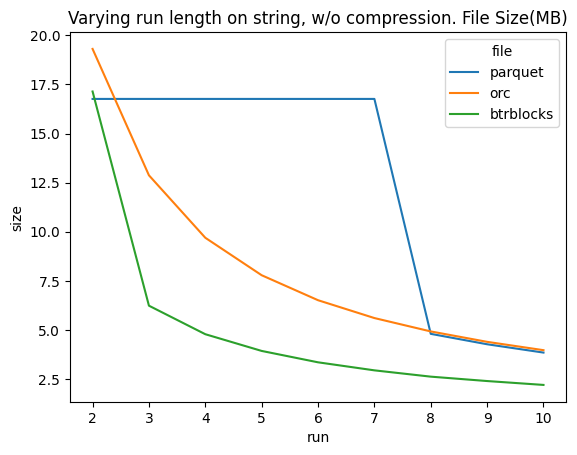

In [34]:
sns.lineplot(data = data, x='run', y='size', hue='file', )
plt.title('Varying run length on string, w/o compression. File Size(MB)')

Text(0.5, 1.0, 'Varying run length on string, w/o compression. Read Time(s)')

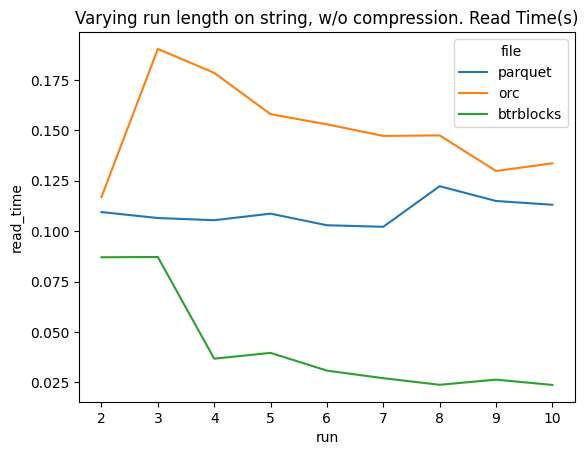

In [36]:
sns.lineplot(data = data, x='run', y='read_time', hue='file', )
plt.title('Varying run length on string, w/o compression. Read Time(s)')

In [11]:
print(btrblocks_out)

('Total: 18181076 Bytes 197800000 Bytes 86371 us 2184.03 MB/s',)


# Decode time on varying compressions

In [2]:
# pq_config = enumerate_config(f'{PROJ_SRC_DIR}/python/experiments/pq_default.json')
# orc_config = enumerate_config(f'{PROJ_SRC_DIR}/python/experiments/orc_default.json')
pq_config = enumerate_config(f'{PROJ_SRC_DIR}/python/experiments/pq_encoding.json')
orc_config = enumerate_config(f'{PROJ_SRC_DIR}/python/experiments/orc_encoding.json')
pq_param = pq_config[0]
orc_param = orc_config[0]
import pyarrow.orc as po
from pyarrow import csv
import pyarrow.parquet as pq
os.chdir(f'{PROJ_SRC_DIR}/python')
workload_list = ['int', 'float', 'string']
compression_list = ['SNAPPY', 'ZSTD', 'LZ4', 'NONE']
for compression in compression_list:
    orc_param['compression'] = compression if compression != 'NONE' else "UNCOMPRESSED"
    pq_param['compression'] = compression
    for wl in workload_list:
        base_name = f'{wl}_r{num_rows}_c{num_cols}'
        table, _ = read_csv(f'encoding/{base_name}/gen_data/{base_name}.csv')
        po.write_table(
            table, f'encoding/{base_name}.{compression.lower()}.orc', **orc_param)
        pq.write_table(table, f'encoding/{base_name}.{compression.lower()}.parquet', 
                **pq_param)
        # os.system(f'mv {base_name}.orc encoding/{base_name}.orc')
os.chdir(f'{PROJ_SRC_DIR}/python/encoding')

loading config from /home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/python/experiments/pq_encoding.json ...
loading config from /home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/python/experiments/orc_encoding.json ...


In [3]:
import yaml
os.chdir(f'{PROJ_SRC_DIR}/python')
for wl in workload_list:
        base_name = f'{wl}_r{num_rows}_c{num_cols}'
        arrow_schema_name = f'encoding/{base_name}/gen_data/{base_name}_arrow_schema.txt'
        with open(arrow_schema_name, 'r') as f:
            lines = f.readlines()
        columns = []
        cnt = 0
        for line in lines:
            if 'message' in line or '}' in line or len(line)==0:
                print(line)
                continue
            col_name = f'col{cnt}'
            col_type = None
            if 'String' in line:
                col_type = 'string'
            elif 'int' in line:
                col_type = 'integer'
            elif 'double' in line:
                col_type = 'double'
            if col_type is None:
                print(line)
                col_type = 'skip'
            cnt += 1
            columns.append({'name': col_name, 'type':col_type})
        with open(f'encoding/{base_name}/gen_data/{base_name}_btrblocks_schema.yaml','w') as f:
            yaml.dump({'columns':columns}, f)

message schema {

}
message schema {

}
message schema {

}


In [4]:
os.chdir(f'{PROJ_SRC_DIR}/python')
for wl in workload_list:
        base_name = f'{wl}_r{num_rows}_c{num_cols}'
        os.system(f'mkdir encoding/{base_name}/gen_data/binary')
        os.system(f'mkdir encoding/{base_name}/gen_data/btr')
    
        os.system(f'~/btrblocks/build/csvtobtr -create_binary -binary encoding/{base_name}/gen_data/binary/ -csv encoding/{base_name}/gen_data/{base_name}.csv -yaml encoding/{base_name}/gen_data/{base_name}_btrblocks_schema.yaml')
        os.system(f'~/btrblocks/build/csvtobtr -create_btr -btr encoding/{base_name}/gen_data/btr/ -binary encoding/{base_name}/gen_data/binary/ -csv encoding/{base_name}/gen_data/{base_name}.csv -yaml encoding/{base_name}/gen_data/{base_name}_btrblocks_schema.yaml')

[2024-03-19 23:48:34.719] [info] Creating binary files in encoding/int_r1000000_c20/gen_data/binary/
column name = col0 , type = integer
column name = col1 , type = integer
column name = col2 , type = integer
column name = col3 , type = integer
column name = col4 , type = integer
column name = col5 , type = integer
column name = col6 , type = integer
column name = col7 , type = integer
column name = col8 , type = integer
column name = col9 , type = integer
column name = col10 , type = integer
column name = col11 , type = integer
column name = col12 , type = integer
column name = col13 , type = integer
column name = col14 , type = integer
column name = col15 , type = integer
column name = col16 , type = integer
column name = col17 , type = integer
column name = col18 , type = integer
column name = col19 , type = integer
[haoyu.debug.Parser] writing binary fileencoding/int_r1000000_c20/gen_data/binary/1_col0.bitmap
Writing binary file : encoding/int_r1000000_c20/gen_data/binary/1_col0.bi

!!! compressed is larger than raw: 
for : values - scheme = DICT difference = 1. Falling back to uncompressed.
!!! compressed is larger than raw: 
for : values - scheme = DICT difference = 5. Falling back to uncompressed.


[2024-03-19 23:48:45.587] [info] Creating binary files in encoding/float_r1000000_c20/gen_data/binary/
column name = col0 , type = double
column name = col1 , type = double
column name = col2 , type = double
column name = col3 , type = double
column name = col4 , type = double
column name = col5 , type = double
column name = col6 , type = double
column name = col7 , type = double
column name = col8 , type = double
column name = col9 , type = double
column name = col10 , type = double
column name = col11 , type = double
column name = col12 , type = double
column name = col13 , type = double
column name = col14 , type = double
column name = col15 , type = double
column name = col16 , type = double
column name = col17 , type = double
column name = col18 , type = double
column name = col19 , type = double
[haoyu.debug.Parser] writing binary fileencoding/float_r1000000_c20/gen_data/binary/1_col0.bitmap
Writing binary file : encoding/float_r1000000_c20/gen_data/binary/1_col0.bitmap
[haoyu.de

!!! compressed is larger than raw: 
for : values - scheme = DICT difference = 9. Falling back to uncompressed.
!!! compressed is larger than raw: 
for : values - scheme = DICT difference = 21. Falling back to uncompressed.


[2024-03-19 23:49:06.544] [info] Creating binary files in encoding/string_r1000000_c20/gen_data/binary/
column name = col0 , type = string
column name = col1 , type = string
column name = col2 , type = string
column name = col3 , type = string
column name = col4 , type = string
column name = col5 , type = string
column name = col6 , type = string
column name = col7 , type = string
column name = col8 , type = string
column name = col9 , type = string
column name = col10 , type = string
column name = col11 , type = string
column name = col12 , type = string
column name = col13 , type = string
column name = col14 , type = string
column name = col15 , type = string
column name = col16 , type = string
column name = col17 , type = string
column name = col18 , type = string
column name = col19 , type = string
[haoyu.debug.Parser] writing binary fileencoding/string_r1000000_c20/gen_data/binary/1_col0.bitmap
Writing binary file : encoding/string_r1000000_c20/gen_data/binary/1_col0.bitmap
[haoyu

In [7]:
# running experiments
my_password = "Woshimima2@"
os.system('rm outputs/stats.json')
os.chdir(f'{PROJ_SRC_DIR}/python/encoding')
for i in range(10):
    for wl in workload_list:
        base_name = f'{wl}_r{num_rows}_c{num_cols}'
        os.system(f'echo {my_password} | sudo -S sync; echo {my_password} | sudo sh -c "/usr/bin/echo 3 > /proc/sys/vm/drop_caches"')
        time.sleep(1)
        btrblocks_out = os.popen(f'''~/btrblocks/build/decompression-speed -output_summary \
            -btr {base_name}/gen_data/btr/ -threads 1''').read().split('\n')[-2],
        btrblocks_read = float(btrblocks_out[0].split(' ')[-4])
        btrblocks_size = float(btrblocks_out[0].split(' ')[1])
        btrblocks_out_preload = os.popen(f'''~/btrblocks/build/decompression-speed -output_summary \
                        -btr {base_name}/gen_data/btr/ -threads 1''').read().split('\n')[-2],
        btrblocks_read_preload = float(btrblocks_out_preload[0].split(' ')[-4])
        output_stats = {}
        output_stats['workload'] = wl
        output_stats['i'] = i
        output_stats['file'] = 'btrblocks'
        output_stats['size'] = btrblocks_size
        output_stats['read_time'] = btrblocks_read
        output_stats['read_time_preload'] = btrblocks_read_preload
        output_stats['compression'] = "none"
        parse_output(output_stats)
        
    for c in compression_list:
        for wl in workload_list:
                base_name = f'{wl}_r{num_rows}_c{num_cols}'
                os.system(f'echo {my_password} | sudo -S sync; echo {my_password} | sudo sh -c "/usr/bin/echo 3 > /proc/sys/vm/drop_caches"')
                time.sleep(1)
                pq_read = float(os.popen(f'''{scan_exec_pq} \
                        --batch_size=1024 ./{base_name}.{c.lower()}.parquet''').read().split('\n')[0].split(' ')[-2])
                pq_read_preload = float(os.popen(f'''{scan_exec_pq} \
                        --batch_size=1024 ./{base_name}.{c.lower()}.parquet''').read().split('\n')[0].split(' ')[-2])
                os.system(f'echo {my_password} | sudo -S sync; echo {my_password} | sudo sh -c "/usr/bin/echo 3 > /proc/sys/vm/drop_caches"')
                time.sleep(1)
                orc_read = float(os.popen(f'''{HOME_DIR}/orc/orc/build/tools/src/orc-scan \
                        -b 1024 ./{base_name}.{c.lower()}.orc''').read().split('\n')[0].split(' ')[-1])
                orc_read_preload = float(os.popen(f'''{HOME_DIR}/orc/orc/build/tools/src/orc-scan \
                        -b 1024 ./{base_name}.{c.lower()}.orc''').read().split('\n')[0].split(' ')[-1])
                orc_size = os.path.getsize(f'{base_name}.{c.lower()}.orc')
                pq_size = os.path.getsize(f'{base_name}.{c.lower()}.parquet')
                
                output_stats = {}
                output_stats['workload'] = wl
                output_stats['i'] = i
                output_stats['file'] = 'parquet'
                output_stats['size'] = pq_size
                output_stats['read_time'] = pq_read
                output_stats['read_time_preload'] = pq_read_preload
                output_stats['compression'] = c.lower()
                parse_output(output_stats)
                output_stats['file'] = 'orc'
                output_stats['size'] = orc_size
                output_stats['read_time'] = orc_read
                output_stats['read_time_preload'] = orc_read_preload
                output_stats['compression'] = c.lower()
                parse_output(output_stats)
collect_results()
os.system('mv outputs/stats.csv ../outputs/{}_{}.csv'.format('decode_speed_compression', timestamp))

[sudo] password for haoyuq: Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
[sudo] password for haoyuq: Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
[sudo] password for haoyuq: Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
Decompressing columns: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
[sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoyuq: [sudo] password for haoy

0

In [12]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("../outputs/decode_speed_compression_20240319_233404.csv", header=0)
btr = data[(data['file']=='btrblocks') & (data['run'].isna())]
base = data[(data['file']!='btrblocks') & (data['run'].isna())]

In [25]:
btr['size'] = btr['size'].apply(lambda x: float(x))

/tmp/ipykernel_284107/2233344085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btr['size'] = btr['size'].apply(lambda x: float(x))


In [26]:
btr_stats = btr.groupby('workload').mean().reset_index()

/tmp/ipykernel_284107/63806516.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  btr_stats = btr.groupby('workload').mean().reset_index()


In [51]:
import copy
btr_stats['compression'] = 'lz4'
lz4_btr = copy.deepcopy(btr_stats)
btr_stats['compression'] = 'none'
none_btr = copy.deepcopy(btr_stats)
btr_stats['compression'] = 'snappy'
snappy_btr = copy.deepcopy(btr_stats)
btr_stats['compression'] = 'zstd'
zstd_btr = copy.deepcopy(btr_stats)

In [57]:
btr_adds = pd.concat([lz4_btr, none_btr, snappy_btr, zstd_btr])
btr_adds['file'] = 'btrblocks'

In [58]:
btr_adds['size'] = btr_adds['size'] / (1024 * 1024)
btr_adds['read_time'] = btr_adds['read_time'] / (1000 * 1000)
btr_adds['read_time_preload'] = btr_adds['read_time_preload'] / (1000 * 1000)


In [59]:
data = pd.concat([btr_adds, base_stats])

In [28]:
base['size'] = base['size'].apply(lambda x: float(x))

/tmp/ipykernel_284107/2865378400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['size'] = base['size'].apply(lambda x: float(x))


In [33]:
base_stats = base.groupby(['file','workload','compression']).mean().reset_index()

In [36]:
base_stats['size'] = base_stats['size']/(1024*1024)

In [60]:
data

,workload,run,size,read_time,read_time_preload,i,compression,file
0,float,NaN,69.383436,0.070716,0.068686,4.5,lz4,btrblocks
1,int,NaN,12.734429,0.032623,0.033646,4.5,lz4,btrblocks
2,string,NaN,144.815288,0.405954,0.406100,4.5,lz4,btrblocks
0,float,NaN,69.383436,0.070716,0.068686,4.5,none,btrblocks
1,int,NaN,12.734429,0.032623,0.033646,4.5,none,btrblocks
2,string,NaN,144.815288,0.405954,0.406100,4.5,none,btrblocks
0,float,NaN,69.383436,0.070716,0.068686,4.5,snappy,btrblocks
1,int,NaN,12.734429,0.032623,0.033646,4.5,snappy,btrblocks
2,string,NaN,144.815288,0.405954,0.406100,4.5,snappy,btrblocks
0,float,NaN,69.383436,0.070716,0.068686,4.5,zstd,btrblocks


/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ha

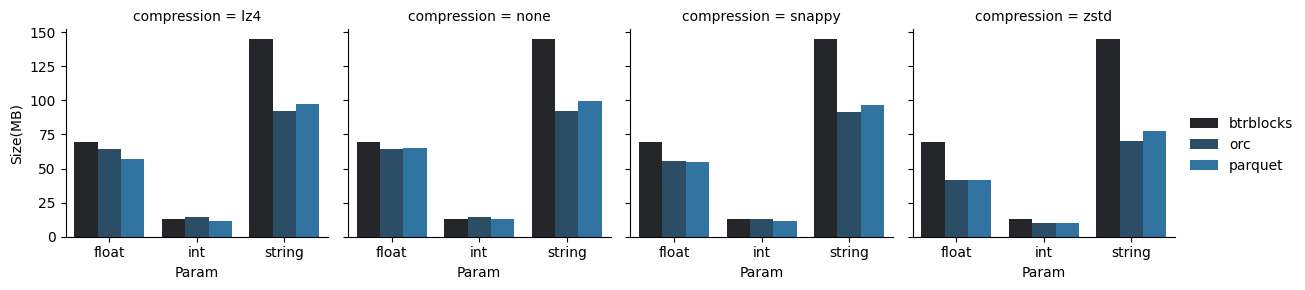

In [61]:
g = sns.FacetGrid(data, col="compression")
g = g.map(sns.barplot, "workload", "size", "file")

g.add_legend()
g.set_axis_labels("Param", "Size(MB)")

/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/haoyuq/miniconda3/envs/gen/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ha

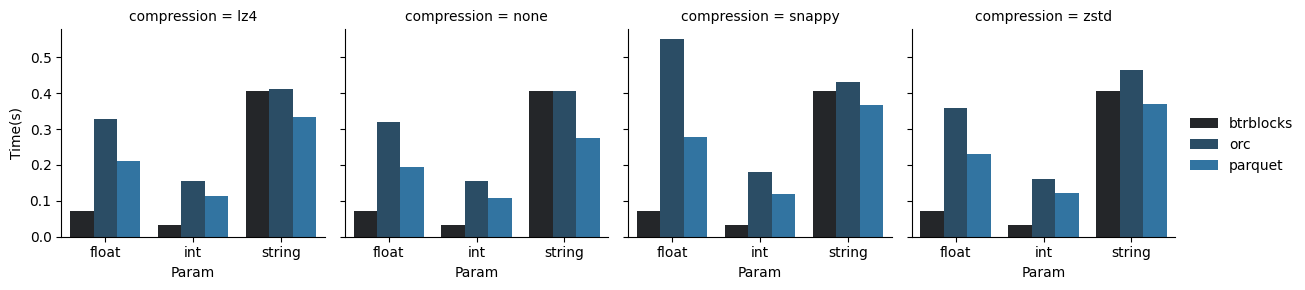

In [63]:
g = sns.FacetGrid(data, col="compression")
g = g.map(sns.barplot, "workload", "read_time", "file")

g.add_legend()
g.set_axis_labels("Param", "Time(s)")